# Método de Lagrange
## Interpolación polinomial de grado 2 con 3 puntos

In [1]:
# Celda 1: Importaciones
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Celda 2: Función objetivo
f = lambda x: x**4 - 4*x**3 + 3*x**2 + 5
# Función ejemplo: x⁴ - 4x³ + 3x² + 5. Buscamos mínimo local en [0, 4].

In [3]:
# Celda 3: Implementación del método de Lagrange
def metodo_lagrange(f, a, b, tol=1e-6, max_iter=100):
    iteraciones, x_vals, fx_vals, errores = [], [], [], []
    x_n = (a + b) / 2  # Punto inicial
    
    for i in range(max_iter):
        x_prev = x_n
        # Tres puntos para interpolación
        x0, x1, x2 = a, (a + b) / 2, b
        y0, y1, y2 = f(x0), f(x1), f(x2)
        
        # Polinomio de Lagrange L(x) = y0*L0(x) + y1*L1(x) + y2*L2(x)
        # Donde Li(x) son los polinomios base de Lagrange
        # Para encontrar el vértice: L'(x) = 0
        # Desarrollando y simplificando las derivadas de los polinomios de Lagrange:
        denom = 2 * ((x0 - x1) * (x0 - x2) * y0 + (x1 - x0) * (x1 - x2) * y1 + (x2 - x0) * (x2 - x1) * y2)
        numer = ((x1 - x2) * (x0**2 - x2**2) * y0 + (x2 - x0) * (x1**2 - x0**2) * y1 + (x0 - x1) * (x2**2 - x1**2) * y2)
        
        if abs(denom) < 1e-12:
            break
        x_n = numer / denom
        x_n = np.clip(x_n, a, b)
        error = abs(x_n - x_prev)
        
        iteraciones.append(i + 1)
        x_vals.append(x_n)
        fx_vals.append(f(x_n))
        errores.append(error)
        
        # Actualizar intervalo hacia el mínimo
        if x_n < (a + b) / 2:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
        
        if error < tol: break
    
    tabla = pd.DataFrame({'Iteración': iteraciones, 'x_n': x_vals, 'f(x_n)': fx_vals, 'Error_abs': errores})
    return x_n, tabla, x_vals

In [4]:
# Celda 4: Ejecución con caso por defecto
x_opt, tabla, historial = metodo_lagrange(f, 0, 4)

print("Óptimo encontrado:", x_opt)
print(tabla.round(6))

Óptimo encontrado: 2.0
   Iteración       x_n    f(x_n)  Error_abs
0          1  0.000000  5.000000   2.000000
1          2  1.928571  1.299589   1.928571
2          3  2.000000  1.000000   0.071429
3          4  2.000000  1.000000   0.000000


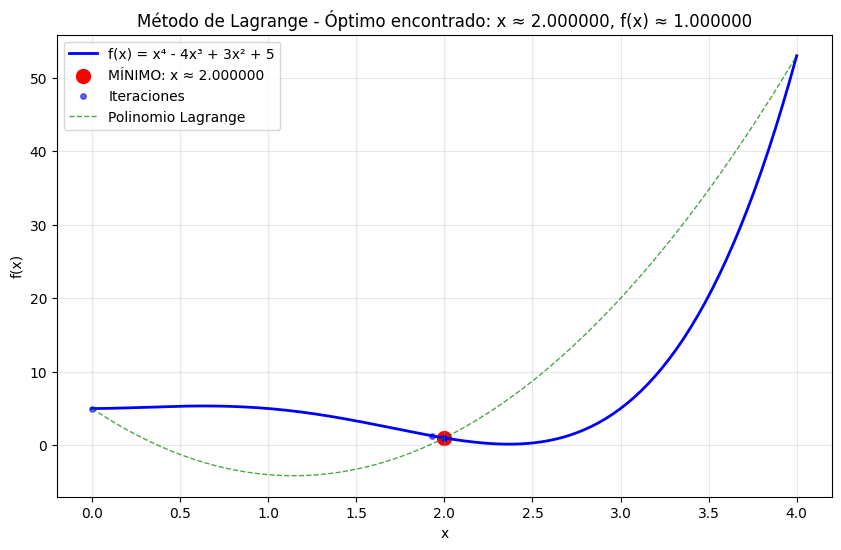

In [5]:
# Celda 5: Gráfica de convergencia
x = np.linspace(0, 4, 200)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='f(x) = x⁴ - 4x³ + 3x² + 5')
plt.scatter(x_opt, f(x_opt), color='red', s=100, label=f'MÍNIMO: x ≈ {x_opt:.6f}')
plt.scatter(historial, [f(xi) for xi in historial], color='blue', s=15, alpha=0.6, label='Iteraciones')

# Mostrar polinomio de Lagrange final (últimos 3 puntos)
if len(historial) >= 3:
    x0, x1, x2 = 0, 2, 4  # Puntos de interpolación finales
    y0, y1, y2 = f(x0), f(x1), f(x2)
    x_poly = np.linspace(0, 4, 100)
    L0 = ((x_poly - x1) * (x_poly - x2)) / ((x0 - x1) * (x0 - x2))
    L1 = ((x_poly - x0) * (x_poly - x2)) / ((x1 - x0) * (x1 - x2))
    L2 = ((x_poly - x0) * (x_poly - x1)) / ((x2 - x0) * (x2 - x1))
    y_poly = y0 * L0 + y1 * L1 + y2 * L2
    plt.plot(x_poly, y_poly, 'g--', alpha=0.7, linewidth=1, label='Polinomio Lagrange')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Método de Lagrange - Óptimo encontrado: x ≈ {x_opt:.6f}, f(x) ≈ {f(x_opt):.6f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
# Celda 6: Interfaz interactiva simple
print("=== Método de Lagrange Interactivo ===")

# Función del usuario
f_str = input("Ingrese f(x) (dejar vacío para usar por defecto): ").strip()
if f_str:
    try:
        f_user = lambda x: eval(f_str)
        f_user(2)  # Validar
        f = f_user
        print(f"Usando función: {f_str}")
    except:
        print("Error: función no válida. Usando caso por defecto.")

# Intervalo del usuario
interval_str = input("Ingrese [a,b] (ej. 0,4) o dejar vacío: ").strip()
a, b = 0, 4
if interval_str:
    try:
        vals = [float(x.strip()) for x in interval_str.split(',')]
        if len(vals) == 2:
            a, b = vals
    except:
        print("Intervalo inválido, usando [0,4]")

# Ejecutar método
try:
    x_opt_user, tabla_user, _ = metodo_lagrange(f, a, b)
    print(f"\nÓptimo encontrado: x = {x_opt_user:.6f}")
    print(tabla_user.tail().round(6))
except Exception as e:
    print(f"Error: {e}")

=== Método de Lagrange Interactivo ===

Óptimo encontrado: x = 2.000000
   Iteración       x_n    f(x_n)  Error_abs
0          1  0.000000  5.000000   2.000000
1          2  1.928571  1.299589   1.928571
2          3  2.000000  1.000000   0.071429
3          4  2.000000  1.000000   0.000000
